In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
mushroom_data = pd.read_csv("mushrooms.csv")

In [35]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [36]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [37]:
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [38]:
#no. of rows and columns
mushroom_data.shape

(8124, 23)

In [39]:
mushroom_columns = list(mushroom_data.columns)

In [40]:
for i in range (len(mushroom_columns)):
    print(mushroom_columns[i] + ':')
    print(mushroom_data[mushroom_columns[i]].unique())

class:
['p' 'e']
cap-shape:
['x' 'b' 's' 'f' 'k' 'c']
cap-surface:
['s' 'y' 'f' 'g']
cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:
['t' 'f']
odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:
['f' 'a']
gill-spacing:
['c' 'w']
gill-size:
['n' 'b']
gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:
['e' 't']
stalk-root:
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring:
['s' 'f' 'k' 'y']
stalk-surface-below-ring:
['s' 'f' 'y' 'k']
stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:
['p']
veil-color:
['w' 'n' 'o' 'y']
ring-number:
['o' 't' 'n']
ring-type:
['p' 'e' 'l' 'f' 'n']
spore-print-color:
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:
['s' 'n' 'a' 'v' 'y' 'c']
habitat:
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [41]:
mushroom_data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [42]:
mushroom_data = mushroom_data.replace("?",np.nan)

In [43]:
mushroom_data['stalk-root'].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [44]:
# ffill
mushroom_data = mushroom_data.ffill(axis=0)
mushroom_data['stalk-root'].value_counts()

b    5207
c    1605
e    1120
r     192
Name: stalk-root, dtype: int64

In [45]:
mushroom_data['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [46]:
mushroom_columns2 = list(mushroom_data.columns)

In [47]:

for i in range (len(mushroom_columns2)):
    print(mushroom_columns2[i] + ':')
    print(mushroom_data[mushroom_columns2[i]].unique())

class:
['p' 'e']
cap-shape:
['x' 'b' 's' 'f' 'k' 'c']
cap-surface:
['s' 'y' 'f' 'g']
cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:
['t' 'f']
odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:
['f' 'a']
gill-spacing:
['c' 'w']
gill-size:
['n' 'b']
gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:
['e' 't']
stalk-root:
['e' 'c' 'b' 'r']
stalk-surface-above-ring:
['s' 'f' 'k' 'y']
stalk-surface-below-ring:
['s' 'f' 'y' 'k']
stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:
['p']
veil-color:
['w' 'n' 'o' 'y']
ring-number:
['o' 't' 'n']
ring-type:
['p' 'e' 'l' 'f' 'n']
spore-print-color:
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:
['s' 'n' 'a' 'v' 'y' 'c']
habitat:
['u' 'g' 'm' 'd' 'p' 'w' 'l']


<AxesSubplot:xlabel='class', ylabel='count'>

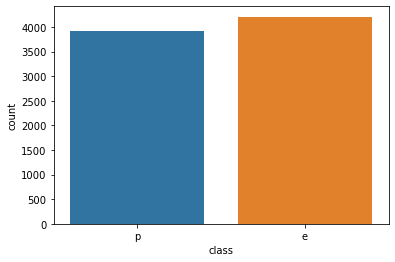

In [48]:
#balanced data
sns.countplot(mushroom_data['class'])

In [49]:
mushroom_data = mushroom_data.astype('category')

In [50]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [51]:
# ENCODING

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [52]:
mushroom_data1 = mushroom_data.drop('class', axis = 1)

In [53]:
for column in mushroom_data1.columns:
    mushroom_data1[column] = labelencoder.fit_transform(mushroom_data1[column])

In [54]:
mushroom_data1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [55]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


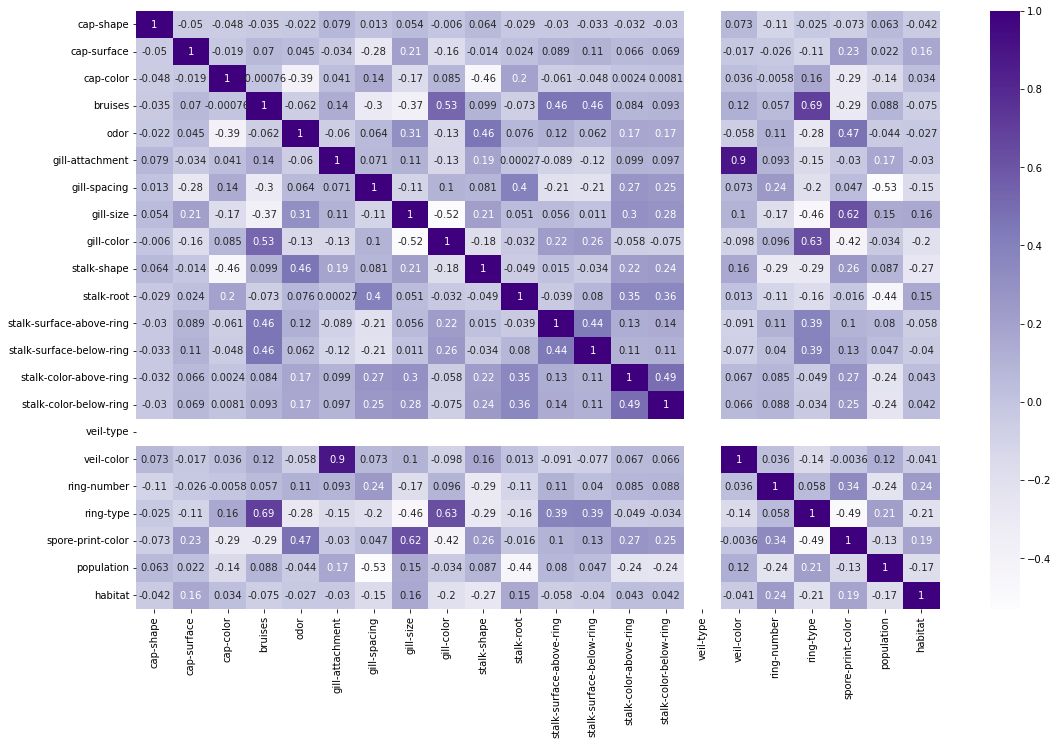

In [56]:
plt.figure(figsize=(18,11))
fig = sns.heatmap(mushroom_data1.corr(),cmap="Purples",annot=True)


In [58]:
mushroom_data1.drop('veil-type', axis = 1, inplace=True)

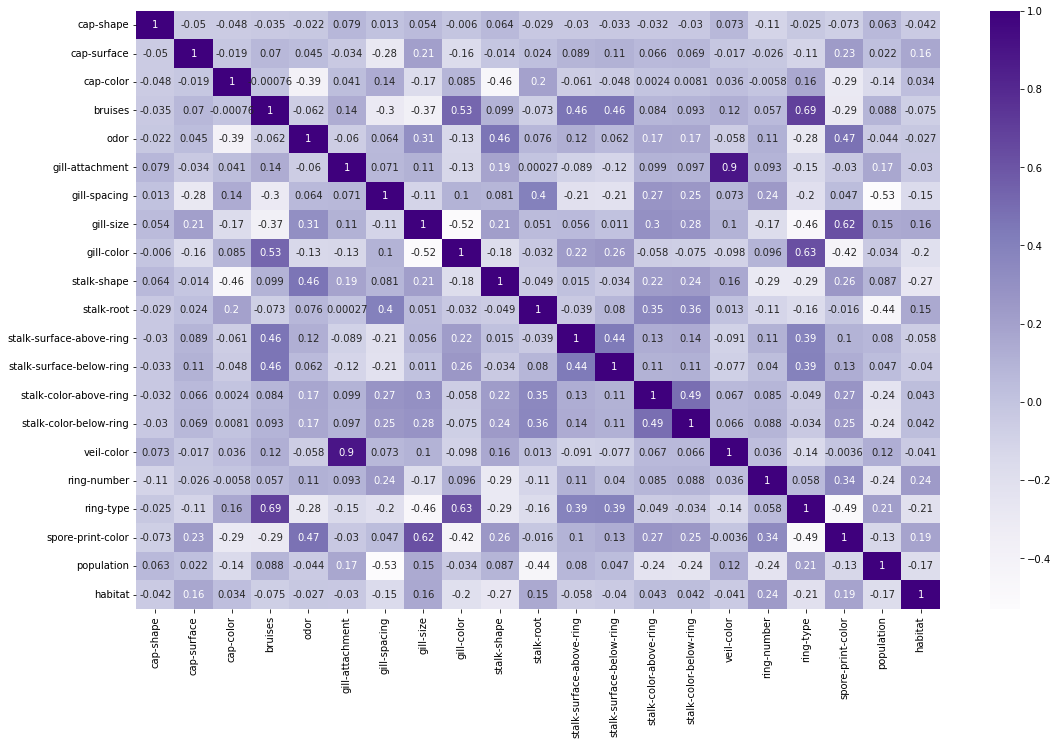

In [59]:
plt.figure(figsize=(18,11))
fig = sns.heatmap(mushroom_data1.corr(),cmap="Purples",annot=True)

In [91]:
mushroom_data['class'].replace('e','edible',inplace = True)
mushroom_data['class'].replace('p','poisonous',inplace = True)

In [92]:
mushroom_data['class']

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: category
Categories (2, object): ['edible', 'poisonous']

In [93]:
y = mushroom_data['class'].values
X = mushroom_data1.values

In [94]:
y.shape

(8124,)

In [95]:
X.shape

(8124, 21)

In [96]:
y

['poisonous', 'edible', 'edible', 'poisonous', 'edible', ..., 'edible', 'edible', 'edible', 'poisonous', 'edible']
Length: 8124
Categories (2, object): ['edible', 'poisonous']

In [97]:
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [98]:
# Import required libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=21)

In [100]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6499, 21) (6499,) (1625, 21) (1625,)


In [101]:
# KNN Classifier
for i in range (1,10):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    print(f'knn training score for neighbors {i}:', KNN.score(X_train,y_train))
    print(f'knn testing score for neighbors {i}:', KNN.score(X_test,y_test))

knn training score for neighbors 1: 1.0
knn testing score for neighbors 1: 1.0
knn training score for neighbors 2: 1.0
knn testing score for neighbors 2: 0.9993846153846154
knn training score for neighbors 3: 1.0
knn testing score for neighbors 3: 0.9987692307692307
knn training score for neighbors 4: 0.9995383905216187
knn testing score for neighbors 4: 0.9993846153846154
knn training score for neighbors 5: 0.9993845206954917
knn testing score for neighbors 5: 0.9987692307692307
knn training score for neighbors 6: 0.9992306508693645
knn testing score for neighbors 6: 0.9981538461538462
knn training score for neighbors 7: 0.998461301738729
knn testing score for neighbors 7: 0.9987692307692307
knn training score for neighbors 8: 0.9986151715648561
knn testing score for neighbors 8: 0.9975384615384615
knn training score for neighbors 9: 0.9979996922603478
knn testing score for neighbors 9: 0.9969230769230769


In [102]:
# taking neighbors = 3
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9987692307692307

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



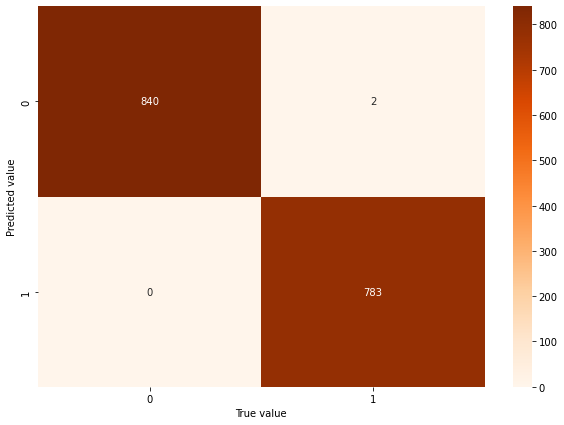

In [103]:
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_knn),cmap="Oranges",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')
print(classification_report(y_test, y_pred_knn))

In [104]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
print('training score for decision tree is :', decision_tree.score(X_train,y_train))
print('testing score for decision tree is :', decision_tree.score(X_test,y_test))

training score for decision tree is : 1.0
testing score for decision tree is : 1.0


accuracy score : 1.0
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(69.0, 0.5, 'Predicted value')

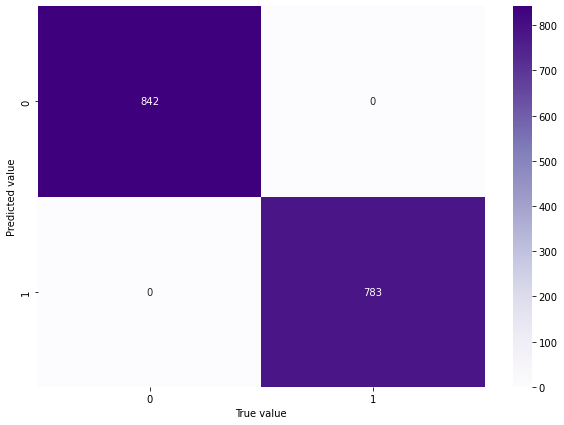

In [105]:
print("accuracy score :" , accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_dt),cmap="Purples",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [106]:
# Random forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)
print('training score for random forest is :', random_forest.score(X_train,y_train))
print('testing score for random forest is :', random_forest.score(X_test,y_test))


training score for random forest is : 1.0
testing score for random forest is : 1.0


accuracy score : 1.0
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(69.0, 0.5, 'Predicted value')

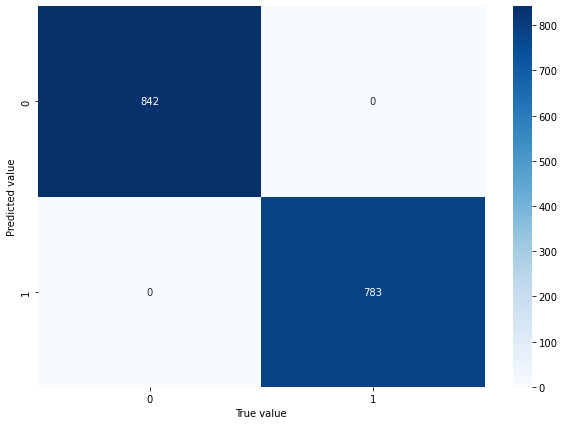

In [107]:
print("accuracy score :" , accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_rf),cmap="Blues",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [108]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print('training score for Support Vector Classifier is :', svc.score(X_train,y_train))
print('testing score for Support Vector Classifier is :', svc.score(X_test,y_test))

training score for Support Vector Classifier is : 0.9924603785197723
testing score for Support Vector Classifier is : 0.9932307692307693


accuracy score : 0.9932307692307693
              precision    recall  f1-score   support

      edible       0.99      1.00      0.99       842
   poisonous       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Text(69.0, 0.5, 'Predicted value')

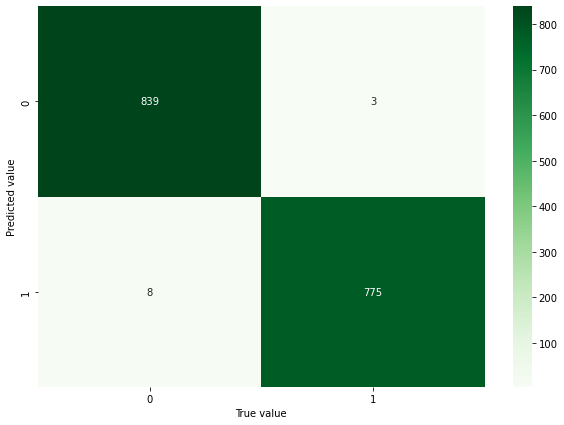

In [109]:
print("accuracy score :" , accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_svc),cmap="Greens",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [110]:
# Gaussian Naive Bayes
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = NB.predict(X_test)
print('training score for Naive Bayes classifier is :', NB.score(X_train,y_train))
print('testing score for Naive Bayes classifier is :', NB.score(X_test,y_test))


training score for Naive Bayes classifier is : 0.9081397138021234
testing score for Naive Bayes classifier is : 0.9163076923076923


accuracy score : 0.9163076923076923
              precision    recall  f1-score   support

      edible       0.94      0.90      0.92       842
   poisonous       0.89      0.94      0.92       783

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



Text(69.0, 0.5, 'Predicted value')

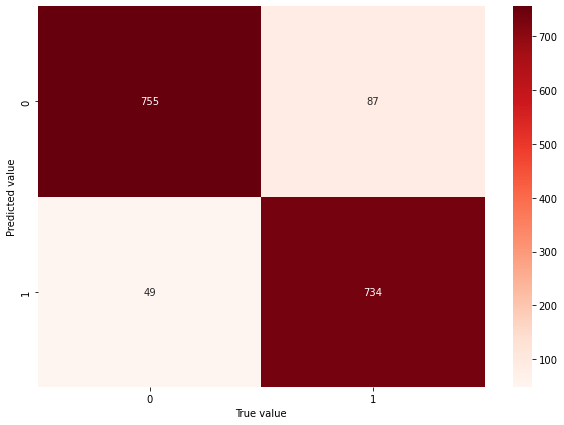

In [111]:
print("accuracy score :" , accuracy_score(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_NB),cmap="Reds",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [112]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
print('training score for Logistic Regression classifier is :', logreg.score(X_train,y_train))
print('testing score for Logistic Regression classifier is :', logreg.score(X_test,y_test))


training score for Logistic Regression classifier is : 0.9501461763348208
testing score for Logistic Regression classifier is : 0.9643076923076923


accuracy score : 0.9643076923076923
              precision    recall  f1-score   support

      edible       0.97      0.96      0.97       842
   poisonous       0.96      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Text(69.0, 0.5, 'Predicted value')

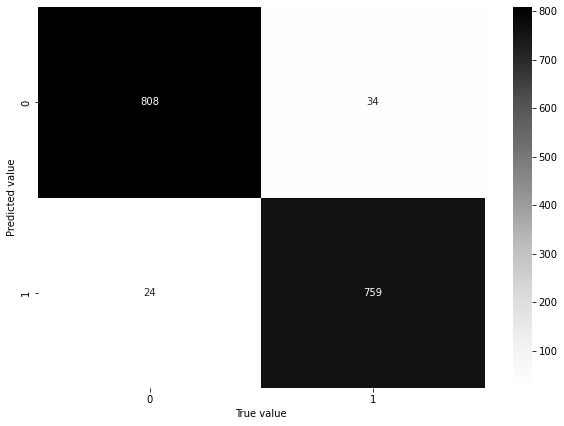

In [113]:
print("accuracy score :" , accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
plt.figure(figsize=(10,7))
fig = sns.heatmap(confusion_matrix(y_test, y_pred_logreg),cmap="Greys",annot=True,fmt = ".0f")
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [114]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree','Random Forest'],
    'Score': [accuracy_score(y_test, y_pred_logreg),accuracy_score(y_test, y_pred_svc),accuracy_score(y_test, y_pred_NB),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_rf)]})

result_df = results.sort_values(by='Score', ascending=False)
result_df.set_index(['Model','Score'])

,
Model,Score
Decision Tree,1.000000
Random Forest,1.000000
KNN,0.998769
Support Vector Machines,0.993231
Logistic Regression,0.964308
Naive Bayes,0.916308


In [115]:
# Model serialization using pickle
import pickle
file1 = 'mushrooms.pkl'

In [116]:
# Using Random forest for our classification 
pickle.dump(random_forest,open(file1,'wb'))

In [ ]:
# model deserialization using pickle
# model = pickle.load(file1,'rb')
# model.predict(X_new)